# Exploratory Data Analysis using Python - A Case Study

*Analyzing responses from the titanic dataset*

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics.

We'll be performing an exploratory analysis and answer some hypothesis based on the dataset(at least three).

Some possible hypothesis that we will define for this dataset are:


Let's begin.

- Selecting and downloading a dataset
- Data preparation and cleaning
- Exploratory analysis and visualization
- Asking and answering interesting questions
- Summarizing inferences and drawing conclusions

## Import Libraries

Let's import some libraries to get started!

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

> Survival value is 1 and 0 indicated not survived

In [28]:
train = pd.read_csv('titanic_train.csv')

In [29]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Let's view some basic information about the data frame.

In [30]:
train.shape

(891, 12)

The data Frame contains 12 `columns` and 891 `rows`

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (891). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

In [32]:
train['PassengerId'] = pd.to_numeric(train.PassengerId, errors='coerce')
train['Survived'] = pd.to_numeric(train.Survived, errors='coerce')
train['Pclass'] = pd.to_numeric(train.Pclass, errors='coerce')
train['Age'] = pd.to_numeric(train.Age, errors='coerce')
train['SibSp'] = pd.to_numeric(train.SibSp, errors='coerce')
train['Parch'] = pd.to_numeric(train.Parch, errors='coerce')

Let's now view some basic statistics about numeric columns.

In [33]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [34]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

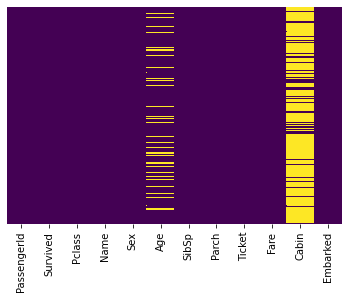

In [35]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 19 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

In this analysis we wouldn't have to worry much about it 

Let's continue on by visualizing some more of the data!

In [36]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Checking the rate of people who survived to those who didn't

<AxesSubplot:xlabel='Survived', ylabel='count'>

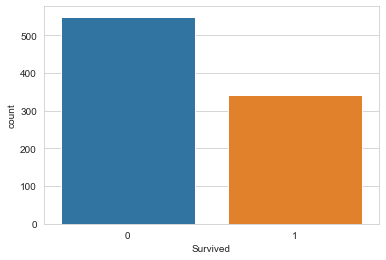

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

### Checking the rate of people who survived based on their gender and those who didn't

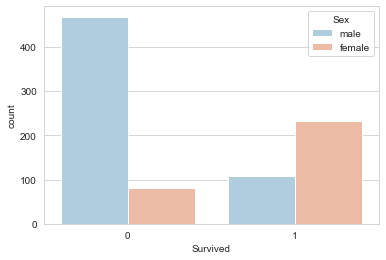

In [41]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r');

### Determining the survival rate associated to the class of passengers

<AxesSubplot:xlabel='Survived', ylabel='count'>

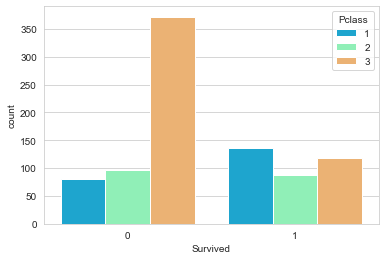

In [44]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

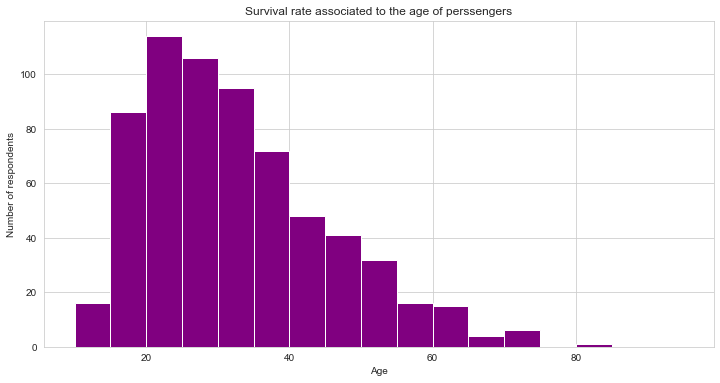

In [49]:
plt.figure(figsize=(12, 6))
plt.title('Survival rate associated to the age of perssengers')
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(train.Age, bins=np.arange(10,100,5), color='purple');

### Determining the survival rate associated to the age of perssengers

<AxesSubplot:>

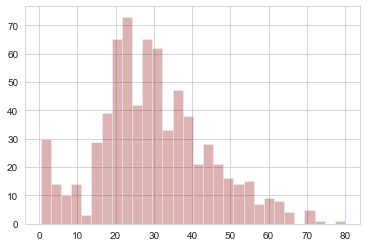

In [45]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

___
## Handling Age Data
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


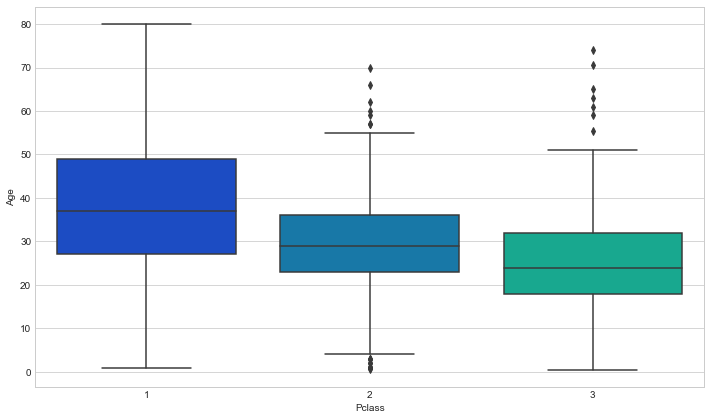

In [26]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [27]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [28]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

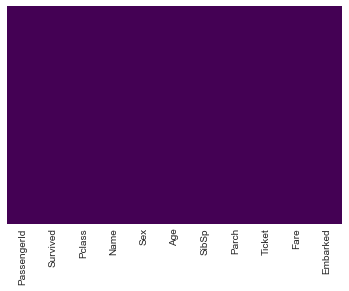

In [33]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:


- After checking the rate of people who survived to those who didn't, we have been able to see that more life was lost than survived.

- After checking the rate of people who survived based on their gender and those who didn't, we have been able to see that more males died and more females survived.

- After checking the rate of people who survived based on the class of passangers and those who didn't, we have been able to see that more `class 3` survived.

- After checking the rate of people who survived based on their age and those who didn't, we have been able to see that people from the age range of `20 - 25` survived more and younger people lost their life same applied to older people from age `58 upwards`

